# Mobile dataset

Logistic Regression performs better than others

Tried dataset with different models:
1.Logistic Regression
2.RandomForest
3.DecisionTree
4.KNN
5.SVC
6.LinearRegression


# Best accuracy with Logistic Regression using lasso regularization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,VarianceThreshold,SelectFromModel
import scipy.stats as st
import pylab

In [4]:
df=pd.read_csv('../dataset/mobile.csv')
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [6]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [10]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

# Visualization

In [ ]:
sns.pairplot(df)

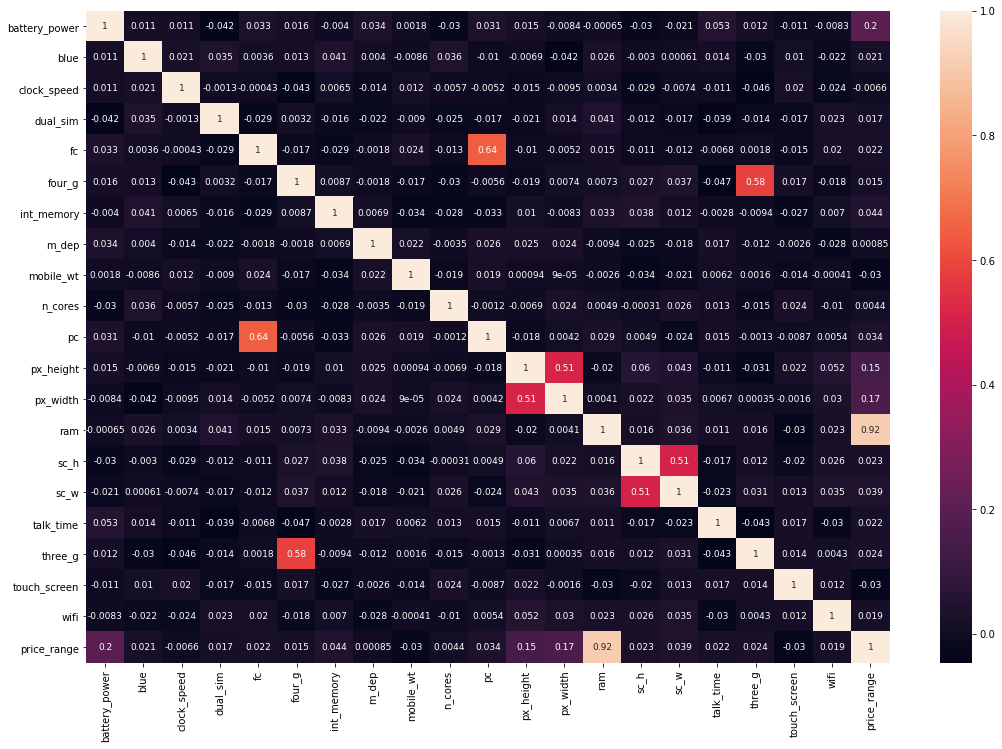

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':9})

C:\Users\ghild\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

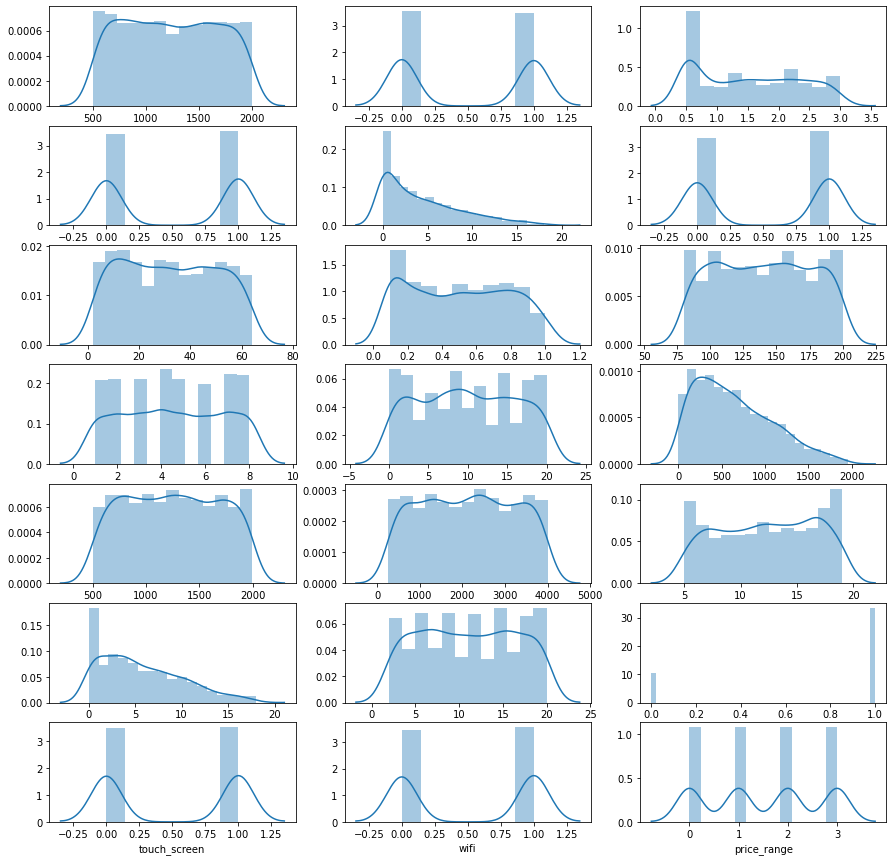

In [12]:
fig,ax=plt.subplots(7,3,figsize=(15,15))
index=0
for i in range(7):
    for j in range(3):
        sns.distplot(df[df.columns[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout

# Splitting data into training  and testing

In [13]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# Scaling features

In [15]:
sc=StandardScaler().fit(x_train)

In [16]:
x_train1=sc.transform(x_train)
x_test1=sc.transform(x_test)

# Building  a Linear Regression model

In [17]:
def lm(x_train,x_test,y_train,y_test):
    clf=LinearRegression()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    r2=r2_score(y_test,pred)
    mse=mean_squared_error(y_test,pred)
    mae=mean_absolute_error(y_test,pred)
    print('r2:',r2)
    print('mse:',mse)
    print('mae:',mae)

In [18]:
lm(x_train,x_test,y_train,y_test)

r2: 0.9210479879371704
mse: 0.10173756274416235
mae: 0.2756971726447992


# Carrying out feature selection and than testing accuracy

In [19]:
cormat=df.corr()

In [20]:
r2=[]
mse=[]
mae=[]
features=[]
name=[]



def model(data,threshold):
    feat=[]
    values=[]
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    df1=pd.DataFrame(data=values,index=feat,columns=['corr values'])
    df2=df[df1.index.values]
    
    
    
    x=df2.drop('price_range',axis=1)
    y=df2['price_range']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    feature=x.shape[1]
    
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    
    
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    features.append(feature)
    name.append(x.columns)
    
    
    df3=pd.DataFrame(data=[name,features,r2,mae,mse],index=['name','features','r2','mae','mse'])
    
    return df3
    
    
    
    

In [21]:
model(cormat['price_range'],0.6).T
model(cormat['price_range'],0.1).T
model(cormat['price_range'],0.001).T
model(cormat['price_range'],0.0001).T

,name,features,r2,mae,mse
0,"Index(['ram'], dtype='object')",1,0.835978,0.359344,0.216878
1,"Index(['battery_power', 'px_height', 'px_width...",4,0.911293,0.276528,0.109308
2,"Index(['battery_power', 'blue', 'clock_speed',...",19,0.914436,0.270198,0.104711
3,"Index(['battery_power', 'blue', 'clock_speed',...",20,0.916456,0.273574,0.106505


# Logistic regression

In [22]:
acc=[]
feature=[]
est=[]
def model(classifier,df2):
    x=df2.drop('price_range',axis=1)
    y=df2['price_range']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    
    
    clf=classifier()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    
    a=classifier
    est.append(a)
    accu=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
    
    acc.append(accuracy_score(y_test,pred))
    feature.append(len(x.columns))
    
    print('No of features:',len(x.columns))
    print('accuracy', accu)
    print('classification_report:',clas)
    print('confusion_matrix:',con)
    
    df3=pd.DataFrame(data=[est,feature,acc],index=['classifier','features','acc'])
    
    return df3
        
    
    
   

In [23]:
model(LogisticRegression,df).T
model(DecisionTreeClassifier,df).T
model(RandomForestClassifier,df).T
model(SVC,df).T
model(KNeighborsClassifier,df).T


No of features: 20
accuracy 0.955
classification_report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98       102
           1       0.95      0.94      0.95       101
           2       0.89      0.96      0.92        81
           3       0.99      0.95      0.97       116

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.96       400

confusion_matrix: [[ 99   3   0   0]
 [  2  95   4   0]
 [  0   2  78   1]
 [  0   0   6 110]]
No of features: 20
accuracy 0.8175
classification_report:               precision    recall  f1-score   support

           0       0.91      0.89      0.90        96
           1       0.75      0.83      0.79       103
           2       0.80      0.69      0.74       112
           3       0.81      0.89      0.85        89

    accuracy                           0.82       400
   macro avg       0.82      

,classifier,features,acc
0,<class 'sklearn.linear_model._logistic.Logisti...,20,0.955
1,<class 'sklearn.tree._classes.DecisionTreeClas...,20,0.8175
2,<class 'sklearn.ensemble._forest.RandomForestC...,20,0.895
3,<class 'sklearn.svm._classes.SVC'>,20,0.88
4,<class 'sklearn.neighbors._classification.KNei...,20,0.525


# Feature Selection using lasso and then building model and checking accuracy

In [24]:
sel=SelectFromModel(LogisticRegression(penalty='l1',C=0.05,solver='liblinear')).fit(x_train,y_train)

In [25]:
sel.get_support()

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False])

In [26]:
x_train10=sel.transform(x_train)
x_test10=sel.transform(x_test)

In [27]:
sc=StandardScaler().fit(x_train10)
x_train10=sc.transform(x_train10)
x_test10=sc.transform(x_test10)

In [28]:
x_train10.shape

(1600, 13)

In [29]:
def Las(x_train,x_test,y_train,y_test):
    clf=LogisticRegression ()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    accu=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
   
    print('accuracy', accu)
    print('classification_report:',clas)
    print('confusion_matrix:',con)

In [30]:
Las(x_train10,x_test10,y_train,y_test)

accuracy 0.9625
classification_report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98        95
           1       0.95      0.95      0.95        92
           2       0.95      0.93      0.94        99
           3       0.97      0.98      0.98       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

confusion_matrix: [[ 94   1   0   0]
 [  2  87   3   0]
 [  0   4  92   3]
 [  0   0   2 112]]


# Feature Selection using ridge and then checking accuracy

In [31]:
sel=SelectFromModel(LogisticRegression(penalty='l2',C=0.01,solver='liblinear')).fit(x_train,y_train)

In [32]:
sel.get_support()

array([False,  True,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False, False,  True,
        True,  True])

In [33]:
x_train10=sel.transform(x_train)
x_test10=sel.transform(x_test)

In [34]:
sc=StandardScaler().fit(x_train10)
x_train10=sc.transform(x_train10)
x_test10=sc.transform(x_test10)

In [35]:
x_train10.shape

(1600, 10)

In [36]:
def Las(x_train,x_test,y_train,y_test):
    clf=LogisticRegression ()
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    accu=accuracy_score(y_test,pred)
    clas=classification_report(y_test,pred)
    con=confusion_matrix(y_test,pred)
   
    print('accuracy', accu)
    print('classification_report:',clas)
    print('confusion_matrix:',con)

In [37]:
Las(x_train10,x_test10,y_train,y_test)

accuracy 0.2375
classification_report:               precision    recall  f1-score   support

           0       0.22      0.21      0.21        95
           1       0.19      0.30      0.23        92
           2       0.34      0.29      0.31        99
           3       0.25      0.16      0.19       114

    accuracy                           0.24       400
   macro avg       0.25      0.24      0.24       400
weighted avg       0.25      0.24      0.24       400

confusion_matrix: [[20 33 20 22]
 [26 28 21 17]
 [19 37 29 14]
 [27 53 16 18]]
